<a href="https://colab.research.google.com/github/VoThiKimAnh/python/blob/master/07_Oct_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 07/10/2019

In [0]:
# Find a and b from: ax+b=y, from Huynh Nguyen (Ngoc)

In [12]:
#y=[[a,b]] [[x],[1]] = ax+b
import numpy as np
#y=2x+8, x=1
a=2
b=8
x=1
ab=np.reshape([a,b],[1,2])
x1=np.reshape([x,1],[2,1])
print(np.multiply(ab,x1))

[[2 8]
 [2 8]]


HOMEWORKS
0. Again: compute a,b from y=ax+b
1. Prove that y=ax+b is a linear function
2. A reading 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in long_scalars
  


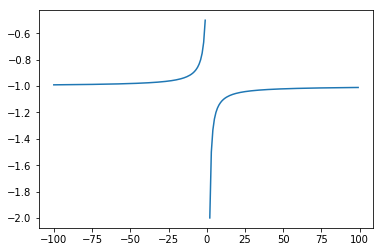

In [13]:
import matplotlib.pyplot as plt
#plot y=x/(1-x)
x=list(np.arange(-100,0))
x=x+list(np.arange(1,100))
# print(x)
y=[i/(1-i) for i in x]
plt.plot(x,y)

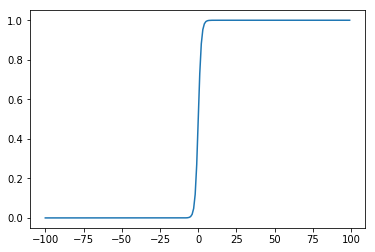

In [14]:
#Logistics regression
import matplotlib.pyplot as plt
#plot y=x/(1-x)
x=np.arange(-100,100)
y=[np.exp(i)/(1+np.exp(i)) for i in x]
plt.plot(x,y)

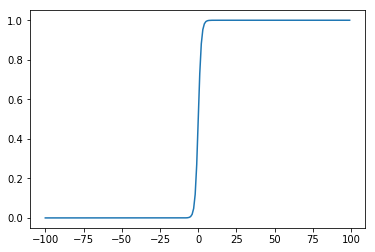

In [15]:
#Logistics regression
import matplotlib.pyplot as plt
#plot y=x/(1-x)
x=np.arange(-100,100)
y=[1/(1+np.exp(-i)) for i in x]
plt.plot(x,y)

In [16]:
import pandas as pd
path=r"/content/Train.csv"
data=pd.read_csv(path)
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,13,28,29,30,31,33,35,36,37,38,39,40,41,42,43,44,45,46,47,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#choose the non NaN columns:
# 5 feature: YearMade, MachineHoursCurrentMeter, fiBaseModel, state, ProductGroup
x=data[[]]

In [0]:
# number features: YearMade, MachineHoursCurrentMeter
# categorical features: fiBaseModel, state, ProductGroup

In [18]:
# check NaN
data.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    25441
UsageBand                   28367
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc             15965
fiModelSeries               46834
fiModelDescriptor           43682
ProductSize                 35692
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                30216
Enclosure                      19
Forks                       16220
Pad_Type                    31712
Ride_Control                25198
Stick                       31712
Transmission                23730
Turbocharged                31712
Blade_Extension             49164
Blade_Width   

In [17]:
data.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,5.065700e+04,50657.000000,5.065700e+04,50657.000000,50657.000000,50657.000000,50657.000000,25216.000000
mean,1.229284e+06,26267.308368,1.090624e+06,6389.144126,126.794125,5.714077,1878.254358,4569.298382
std,5.051891e+04,20374.901765,3.360440e+05,5976.399599,5.492184,13.656670,321.497301,5942.254184
min,1.139246e+06,4750.000000,3.230000e+02,28.000000,121.000000,1.000000,1000.000000,0.000000
25%,1.180746e+06,12500.000000,1.019123e+06,3170.000000,121.000000,2.000000,1987.000000,960.750000
50%,1.252590e+06,19500.000000,1.090508e+06,3417.000000,132.000000,3.000000,1996.000000,2631.000000
75%,1.276152e+06,32000.000000,1.324881e+06,6797.000000,132.000000,3.000000,2002.000000,6291.250000
max,1.293344e+06,142000.000000,1.558285e+06,37198.000000,132.000000,99.000000,2010.000000,220893.000000


In [19]:
data.shape

(50657, 53)

In [20]:
data.dtypes

SalesID                       int64
SalePrice                     int64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                  int64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

In [21]:
len(set(data['ModelID']))

2531

In [22]:
len(set(data['ProductGroup']))

6

In [23]:
len(set(data['SalePrice']))

496

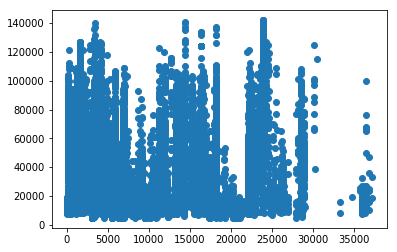

In [24]:

plt.scatter(data['ModelID'],data['SalePrice'])
# %matplotlib inline

In [25]:
data.corr()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
SalesID,1.000000,-0.303624,0.626438,-0.283642,0.926428,0.160544,0.135644,0.015269
SalePrice,-0.303624,1.000000,-0.335922,0.122622,-0.352780,-0.104885,0.032295,0.217966
MachineID,0.626438,-0.335922,1.000000,-0.089194,0.660306,0.124312,0.039749,-0.036402
ModelID,-0.283642,0.122622,-0.089194,1.000000,-0.308168,-0.071149,0.092196,-0.159984
datasource,0.926428,-0.352780,0.660306,-0.308168,1.000000,0.188380,0.166701,-0.058477
auctioneerID,0.160544,-0.104885,0.124312,-0.071149,0.188380,1.000000,0.016417,-0.013521
YearMade,0.135644,0.032295,0.039749,0.092196,0.166701,0.016417,1.000000,-0.213701
MachineHoursCurrentMeter,0.015269,0.217966,-0.036402,-0.159984,-0.058477,-0.013521,-0.213701,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f450ffbfe48>,
      dtype=object)

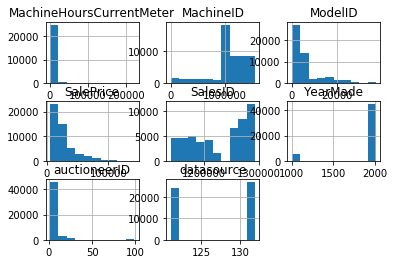

In [26]:
data.hist()

## HOMEWORK

In [186]:
#Pick up 5 features in order to build a linear regression and tell the performance
# SalePrice
# 5 feature: YearMade, MachineHoursCurrentMeter, Enclosure, state, ProductGroup
#validation file
x=data[['SalePrice','SalesID','YearMade', 'MachineHoursCurrentMeter', 'Enclosure', 'state', 'ProductGroup']]
y_t=x[['SalesID','SalePrice']]
print(x.head())
print(y_t.head())

   SalePrice  SalesID  YearMade  ...   Enclosure           state ProductGroup
0      66000  1139246      2004  ...  EROPS w AC         Alabama           WL
1      57000  1139248      1996  ...  EROPS w AC  North Carolina           WL
2      10000  1139249      2001  ...       OROPS        New York          SSL
3      38500  1139251      2001  ...  EROPS w AC           Texas          TEX
4      11000  1139253      2007  ...       EROPS        New York          SSL

[5 rows x 7 columns]
   SalesID  SalePrice
0  1139246      66000
1  1139248      57000
2  1139249      10000
3  1139251      38500
4  1139253      11000


In [187]:
print(set(x['Enclosure']))
Enclosure=x.groupby(['Enclosure'])['SalesID'].count()
print(Enclosure.head())

# OROPS
#fill nan from x['Enclosure'] to 'OROPS'.
import numpy as np
x['Enclosure'] = x['Enclosure'].replace(np.nan, 'OROPS')

#fill nan from fil['MachineHoursCurrentMeter'] to 0.
x['MachineHoursCurrentMeter'] = x['MachineHoursCurrentMeter'].replace(np.nan, 0)
print(x.isna().sum())
print(list(set(x['Enclosure'])))


{'OROPS', 'EROPS w AC', 'EROPS', nan}
Enclosure
EROPS         12854
EROPS w AC    10398
OROPS         27386
Name: SalesID, dtype: int64
SalePrice                   0
SalesID                     0
YearMade                    0
MachineHoursCurrentMeter    0
Enclosure                   0
state                       0
ProductGroup                0
dtype: int64
['OROPS', 'EROPS w AC', 'EROPS']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [177]:
# state
print(len(set(x['state'])))
print(set(x['state']))

53
{'New Jersey', 'New Hampshire', 'Alabama', 'Wisconsin', 'California', 'Kansas', 'Minnesota', 'South Dakota', 'Washington DC', 'Oregon', 'Arizona', 'Iowa', 'North Carolina', 'Virginia', 'Alaska', 'Hawaii', 'Mississippi', 'Michigan', 'Washington', 'Massachusetts', 'Idaho', 'Georgia', 'Wyoming', 'Missouri', 'Kentucky', 'Connecticut', 'West Virginia', 'Louisiana', 'Nevada', 'Maryland', 'Oklahoma', 'Colorado', 'Nebraska', 'Texas', 'Delaware', 'Puerto Rico', 'Tennessee', 'South Carolina', 'Vermont', 'Maine', 'Arkansas', 'Montana', 'Florida', 'Ohio', 'North Dakota', 'New Mexico', 'Illinois', 'New York', 'Unspecified', 'Utah', 'Rhode Island', 'Indiana', 'Pennsylvania'}


In [178]:
# ProductGroup
print(len(set(x['ProductGroup'])))
print(set(x['ProductGroup']))

6
{'BL', 'WL', 'TTT', 'TEX', 'MG', 'SSL'}


In [179]:
# 5 feature: YearMade, MachineHoursCurrentMeter, Enclosure, state, ProductGroup
x.head(20)

,SalePrice,SalesID,YearMade,MachineHoursCurrentMeter,Enclosure,state,ProductGroup
0,66000,1139246,2004,68.0,EROPS w AC,Alabama,WL
1,57000,1139248,1996,4640.0,EROPS w AC,North Carolina,WL
2,10000,1139249,2001,2838.0,OROPS,New York,SSL
3,38500,1139251,2001,3486.0,EROPS w AC,Texas,TEX
4,11000,1139253,2007,722.0,EROPS,New York,SSL
5,26500,1139255,2004,508.0,OROPS,Arizona,BL
6,21000,1139256,1993,11540.0,EROPS,Florida,TEX
7,27000,1139261,2001,4883.0,OROPS,Illinois,BL
8,21500,1139272,2008,302.0,EROPS,Texas,TEX
9,65000,1139275,1000,20700.0,EROPS w AC,Florida,WL


In [188]:
#encoding for Enclosure
t=list(set(x['Enclosure']))
x['Enclosure']=pd.DataFrame({'Enclosure': x['Enclosure']})
x['Enclosure'] = x['Enclosure'].astype('category')
x['Enclosure'] = x['Enclosure'].cat.reorder_categories(t, ordered=True)
x['Enclosure'] = x['Enclosure'].cat.codes
print(x[['Enclosure']].head())
x.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


   Enclosure
0          1
1          1
2          0
3          1
4          2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,SalePrice,SalesID,YearMade,MachineHoursCurrentMeter,Enclosure,state,ProductGroup
0,66000,1139246,2004,68.0,1,Alabama,WL
1,57000,1139248,1996,4640.0,1,North Carolina,WL
2,10000,1139249,2001,2838.0,0,New York,SSL
3,38500,1139251,2001,3486.0,1,Texas,TEX
4,11000,1139253,2007,722.0,2,New York,SSL
5,26500,1139255,2004,508.0,0,Arizona,BL
6,21000,1139256,1993,11540.0,2,Florida,TEX
7,27000,1139261,2001,4883.0,0,Illinois,BL
8,21500,1139272,2008,302.0,2,Texas,TEX
9,65000,1139275,1000,20700.0,1,Florida,WL


In [189]:
#encoding for state
t=list(set(x['state']))
x['state']=pd.DataFrame({'state': x['state']})
x['state'] = x['state'].astype('category')
x['state'] = x['state'].cat.reorder_categories(t, ordered=True)
x['state'] = x['state'].cat.codes
print(x[['state']].head())
x.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


   state
0      2
1     12
2     47
3     33
4     47


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,SalePrice,SalesID,YearMade,MachineHoursCurrentMeter,Enclosure,state,ProductGroup
0,66000,1139246,2004,68.0,1,2,WL
1,57000,1139248,1996,4640.0,1,12,WL
2,10000,1139249,2001,2838.0,0,47,SSL
3,38500,1139251,2001,3486.0,1,33,TEX
4,11000,1139253,2007,722.0,2,47,SSL
5,26500,1139255,2004,508.0,0,10,BL
6,21000,1139256,1993,11540.0,2,42,TEX
7,27000,1139261,2001,4883.0,0,46,BL
8,21500,1139272,2008,302.0,2,33,TEX
9,65000,1139275,1000,20700.0,1,42,WL


In [190]:
#encoding for ProductGroup
t=list(set(x['ProductGroup']))
x['ProductGroup']=pd.DataFrame({'ProductGroup': x['ProductGroup']})
x['ProductGroup'] = x['ProductGroup'].astype('category')
x['ProductGroup'] = x['ProductGroup'].cat.reorder_categories(t, ordered=True)
x['ProductGroup'] = x['ProductGroup'].cat.codes
print(x[['ProductGroup']].head())
x.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


   ProductGroup
0             1
1             1
2             5
3             3
4             5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,SalePrice,SalesID,YearMade,MachineHoursCurrentMeter,Enclosure,state,ProductGroup
0,66000,1139246,2004,68.0,1,2,1
1,57000,1139248,1996,4640.0,1,12,1
2,10000,1139249,2001,2838.0,0,47,5
3,38500,1139251,2001,3486.0,1,33,3
4,11000,1139253,2007,722.0,2,47,5
5,26500,1139255,2004,508.0,0,10,0
6,21000,1139256,1993,11540.0,2,42,3
7,27000,1139261,2001,4883.0,0,46,0
8,21500,1139272,2008,302.0,2,33,3
9,65000,1139275,1000,20700.0,1,42,1


   YearMade  MachineHoursCurrentMeter  Enclosure  state  ProductGroup
0      2004                      68.0          1      2             1
1      1996                    4640.0          1     12             1
2      2001                    2838.0          0     47             5
3      2001                    3486.0          1     33             3
4      2007                     722.0          2     47             5
   SalePrice
0      66000
1      57000
2      10000
3      38500
4      11000


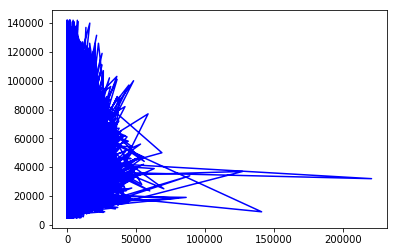

In [191]:
from sklearn import linear_model
# from sklearn.model_selection import train_test_split
cls = linear_model.LinearRegression()
#Fit method is used for fitting your training data into the model
# YearMade,	MachineHoursCurrentMeter,	Enclosure,	state,	ProductGroup
y_t=x[['SalePrice']]
x=x[['YearMade',	'MachineHoursCurrentMeter',	'Enclosure',	'state',	'ProductGroup']]

print(x.head())
print(y_t.head())

# true plot before modeling

plt.plot(x['YearMade'],y_t,c='b')
plt.plot(x['MachineHoursCurrentMeter'],y_t,c='b')
plt.plot(x['Enclosure'],y_t,c='b')
plt.plot(x['state'],y_t,c='b')
plt.plot(x['ProductGroup'],y_t,c='b')

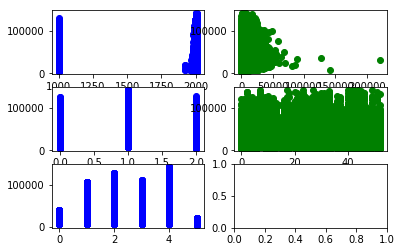

In [208]:
fig,ax=plt.subplots(3,2)
ax[0,0].scatter(x['YearMade'],y_t,c='b')
ax[0,1].scatter(x['MachineHoursCurrentMeter'],y_t,c='g')

ax[1,0].scatter(x['Enclosure'],y_t,c='b')
ax[1,1].scatter(x['state'],y_t,c='g')

ax[2,0].scatter(x['ProductGroup'],y_t,c='b')

In [210]:
cls.fit(x,y_t)
cls.get_params()
print('cls.coef_ = ',cls.coef_)
print('cls.intercept_ = ',cls.intercept_)

cls.coef_ =  [[ 7.98904049e+00  1.44033268e+00  3.28347278e+03  7.91746120e-01
  -2.31812889e+02]]
cls.intercept_ =  [6057.85637987]


In [215]:
#Test on Test.csv
p=r'/content/Test.csv'
test=pd.read_csv(p)
print(test.head())

   SalesID  MachineID  ...  Differential_Type  Steering_Controls
0  1227829    1006309  ...                NaN                NaN
1  1227844    1022817  ...           Standard       Conventional
2  1227847    1031560  ...                NaN                NaN
3  1227848      56204  ...                NaN                NaN
4  1227863    1053887  ...                NaN                NaN

[5 rows x 52 columns]


In [0]:

#encoding for Enclosure
t=list(set(test['Enclosure']))
test['Enclosure']=pd.DataFrame({'Enclosure': test['Enclosure']})
test['Enclosure'] = test['Enclosure'].astype('category')
test['Enclosure'] = test['Enclosure'].cat.reorder_categories(t, ordered=True)
test['Enclosure'] = test['Enclosure'].cat.codes

#encoding for state
t1=list(set(test['state']))
test['state']=pd.DataFrame({'state': test['state']})
test['state'] = test['state'].astype('category')
test['state'] = test['state'].cat.reorder_categories(t1, ordered=True)
test['state'] = test['state'].cat.codes

#encoding for ProductGroup
t2=list(set(test['ProductGroup']))
test['ProductGroup']=pd.DataFrame({'ProductGroup': test['ProductGroup']})
test['ProductGroup'] = test['ProductGroup'].astype('category')
test['ProductGroup'] = test['ProductGroup'].cat.reorder_categories(t2, ordered=True)
test['ProductGroup'] = test['ProductGroup'].cat.codes



In [224]:
test.describe()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,state,ProductGroup,Enclosure
count,1.245700e+04,1.245700e+04,12457.000000,12457.000000,12457.000000,12457.000000,2.129000e+03,12457.000000,12457.000000,12457.000000
mean,5.787463e+06,1.776368e+06,9221.484788,146.680019,11.924380,1868.981055,1.984678e+04,23.582323,2.728185,1.132777
std,1.470164e+06,7.589356e+05,7845.025382,14.158477,29.195676,338.095223,6.727711e+05,15.466203,1.638677,0.799927
min,1.227829e+06,2.110000e+02,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,6.260703e+06,1.065286e+06,3380.000000,149.000000,1.000000,1994.000000,8.480000e+02,7.000000,2.000000,0.000000
50%,6.300886e+06,1.904657e+06,4886.000000,149.000000,1.000000,2002.000000,3.525000e+03,23.000000,3.000000,1.000000
75%,6.454946e+06,2.446075e+06,15474.000000,149.000000,3.000000,2005.000000,7.630000e+03,42.000000,4.000000,2.000000
max,6.643196e+06,2.558557e+06,36941.000000,172.000000,99.000000,2014.000000,3.104628e+07,50.000000,5.000000,3.000000


In [234]:
# 'YearMade',	'MachineHoursCurrentMeter',	'Enclosure',	'state',	'ProductGroup'

#fill nan from fil['MachineHoursCurrentMeter'] to 0.
test['MachineHoursCurrentMeter'] = test['MachineHoursCurrentMeter'].replace(np.nan, 0)

print(test[['YearMade',	'MachineHoursCurrentMeter',	'Enclosure',	'state',	'ProductGroup']].isna().sum())

YearMade                    0
MachineHoursCurrentMeter    0
Enclosure                   0
state                       0
ProductGroup                0
dtype: int64


In [242]:
y_pred = cls.predict(test[['YearMade',	'MachineHoursCurrentMeter',	'Enclosure',	'state',	'ProductGroup']])
test['y_pred']=y_pred
print(test.head())
path=r'/content/TestPredict.csv'
test.to_csv(path)

   SalesID  MachineID  ...  Steering_Controls        y_pred
0  1227829    1006309  ...                NaN  33946.428124
1  1227844    1022817  ...       Conventional  54052.160776
2  1227847    1031560  ...                NaN  33374.825273
3  1227848      56204  ...                NaN  37570.648801
4  1227863    1053887  ...                NaN  31013.719305

[5 rows x 53 columns]


In [246]:
#Upload Valid.csv file and then Predict

#Preparation for data

#STEP1: Upload & Read the Valid.csv file
p=r'/content/Valid.csv'
valid=pd.read_csv(p)
# print(valid.head())

#STEP2: fillna with 0 for 'MachineHoursCurrentMeter' feature.
#fill nan from fil['MachineHoursCurrentMeter'] to 0.
valid['MachineHoursCurrentMeter'] = valid['MachineHoursCurrentMeter'].replace(np.nan, 0)
valid['Enclosure'] = valid['Enclosure'].replace(np.nan, 'OROPS')
# Check Nan for the features
# print(valid[['YearMade',	'MachineHoursCurrentMeter',	'Enclosure',	'state',	'ProductGroup']].isna().sum())

#STEP3: Modification the columns/features: 
#encoding for Enclosure
t=list(set(valid['Enclosure']))
valid['Enclosure']=pd.DataFrame({'Enclosure': valid['Enclosure']})
valid['Enclosure'] = valid['Enclosure'].astype('category')
valid['Enclosure'] = valid['Enclosure'].cat.reorder_categories(t, ordered=True)
valid['Enclosure'] = valid['Enclosure'].cat.codes

#encoding for state
t1=list(set(valid['state']))
valid['state']=pd.DataFrame({'state': valid['state']})
valid['state'] = valid['state'].astype('category')
valid['state'] = valid['state'].cat.reorder_categories(t1, ordered=True)
valid['state'] = valid['state'].cat.codes

#encoding for ProductGroup
t2=list(set(valid['ProductGroup']))
valid['ProductGroup']=pd.DataFrame({'ProductGroup': valid['ProductGroup']})
valid['ProductGroup'] = valid['ProductGroup'].astype('category')
valid['ProductGroup'] = valid['ProductGroup'].cat.reorder_categories(t2, ordered=True)
valid['ProductGroup'] = valid['ProductGroup'].cat.codes

#STEP4: Check Nan for the features
# print(valid[['YearMade',	'MachineHoursCurrentMeter',	'Enclosure',	'state',	'ProductGroup']].isna().sum())

# RUN PREDICTION
y_pred = cls.predict(valid[['YearMade',	'MachineHoursCurrentMeter',	'Enclosure',	'state',	'ProductGroup']])
valid['y_pred']=y_pred
print(valid.head())
path=r'/content/ValidPredict.csv'
valid.to_csv(path)


   SalesID  MachineID  ...  Steering_Controls        y_pred
0  1222837     902859  ...                NaN  19935.030430
1  1222839    1048320  ...                NaN  31044.071934
2  1222841     999308  ...                NaN  39227.638976
3  1222843    1062425  ...                NaN  26679.459799
4  1222845    1032841  ...       Conventional  37104.185948

[5 rows x 53 columns]


In [252]:
#Compare the y_pred with ValidSolution
p=r'/content/ValidSolution.csv'
validSolution=pd.read_csv(p)
# print(validSolution.head())
validSolution['validPrediction']=y_pred
validSolution[['error']]=validSolution[['SalePrice']]-y_pred
print(validSolution.head(20))

#save back the file
path=r'/content/ValidPreSol.csv'
validSolution.to_csv(path)

    SalesID  SalePrice       Usage  validPrediction         error
0   1222837    31000.0  PublicTest     19935.030430  11064.969570
1   1222839    54000.0  PublicTest     31044.071934  22955.928066
2   1222841    26500.0  PublicTest     39227.638976 -12727.638976
3   1222843    10000.0  PublicTest     26679.459799 -16679.459799
4   1222845    35000.0  PublicTest     37104.185948  -2104.185948
5   1222847     8000.0  PublicTest     20914.948314 -12914.948314
6   1222849    33000.0  PublicTest     22849.364438  10150.635562
7   1222850    33500.0  PublicTest     26405.545834   7094.454166
8   1222855    66000.0  PublicTest     24881.241375  41118.758625
9   1222863    25000.0  PublicTest     26231.408077  -1231.408077
10  1222864    29000.0  PublicTest     31054.461232  -2054.461232
11  1222865    39000.0  PublicTest     22589.862941  16410.137059
12  1222867    65000.0  PublicTest     26911.108879  38088.891121
13  1222879    28000.0  PublicTest     27081.036843    918.963157
14  122288